### 3-1．데이터의 이해
#### 데이터 리드

In [2]:
# Pandas의 로드
import pandas as pd

# 파일을 리드
bank_df = pd.read_csv('./bank.csv', sep=',')

# 데이터의 앞에 () 안의 개수만큼 출력
# default = 5 
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [3]:
# 데이터의 앞에 () 안의 개수만큼 출력
# default = 5 
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [4]:
# 데이터의 행수, 열수를 확인
print(bank_df.shape)

(7234, 17)


In [5]:
# 데이터 형을 확인
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


### 결손값의 확인

In [6]:
# 데이터행에 결손값이 포함되어 있는가?
print(bank_df.isnull().any(axis=1)) # axis = 1 : 행

# 데이터열에 결소값이 포함되어 있는가?
print(bank_df.isnull().any(axis=0)) # axis = 0 : 열

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [7]:
# 데이터행별 결손값의 갯수
print(bank_df.isnull().sum(axis=1))

# 데이터열별 결손값의 갯수
print(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [8]:
# 연습문제2
# 데이터행별 결손값의 갯수
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64


### 통계량의 계산

In [9]:
# 데이터형이 수치인 각종 통계량의 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [10]:
# 연습문제3
# 데이터형이 문자열인 각종 통계량의 계산
bank_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


### 데이터의 가시화１

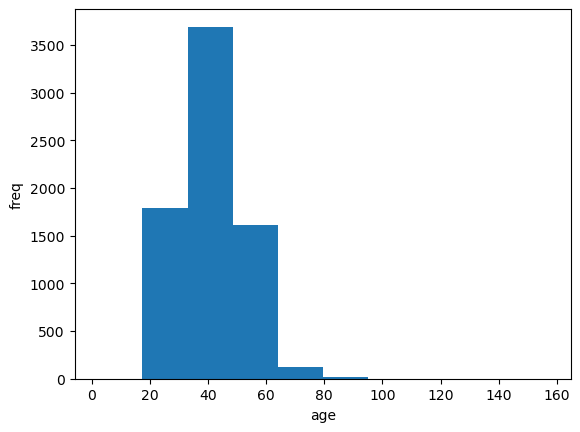

In [11]:
# Matplotlib의 로드
import matplotlib.pyplot as plt
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것.
%matplotlib inline



# age의 히스토그램을 작성
plt.hist(bank_df['age'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

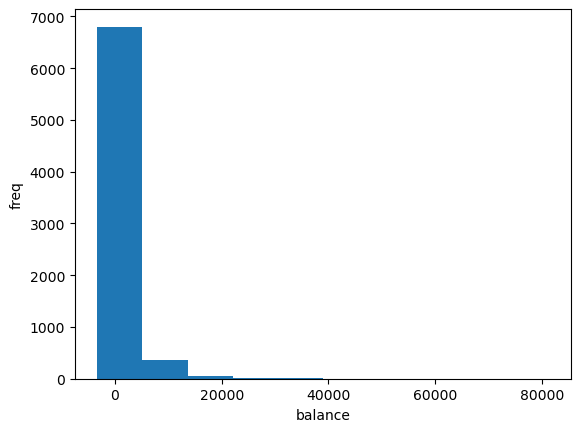

In [12]:
# 연습문제4
# balance의 히스토그램
plt.hist(bank_df['balance'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

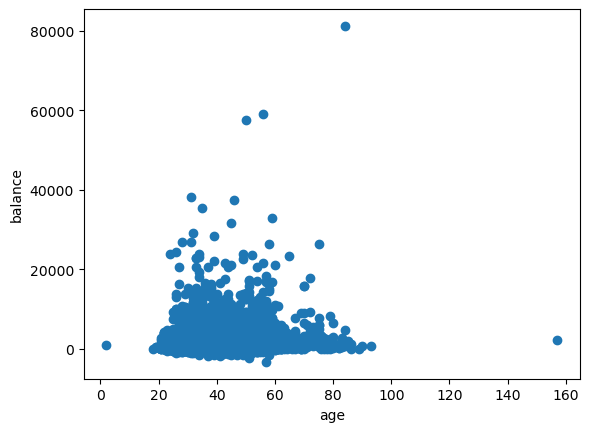

              age   balance
age      1.000000  0.112364
balance  0.112364  1.000000


In [13]:
# age와 balance의 산포도를 작성
# plt.scatter는 산점도를 그려주는 함수
plt.scatter(bank_df['age'], bank_df['balance'])

# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

# age와 balance의 상관계수
# 등간척도 : 관찰대상의 속성을 상대적인 크기로 나타내는것
# 상관계수 : 등간척도 이상의 두 변수 중에서 한 변수의 변화가 다른 변수의 변화에 따라 어떤 변화가 일어나는지를 보여주는 지표
print(bank_df[['age', 'balance']].corr())

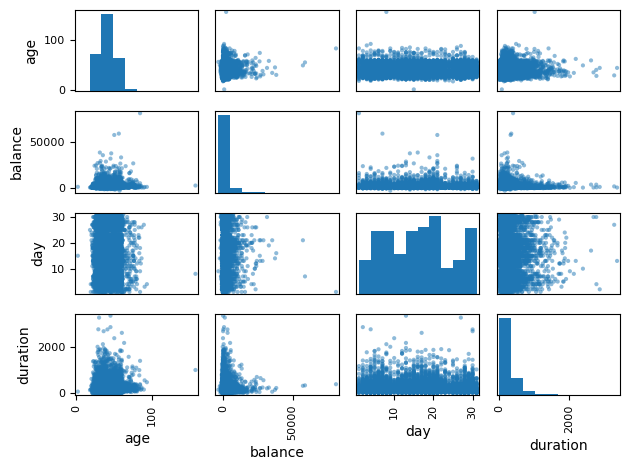

In [14]:
# 연습문제5
# 산포도행렬의 작성
pd.plotting.scatter_matrix(bank_df[['age','balance','day','duration']]) # ? 
plt.tight_layout()
plt.show()

In [22]:
# job값의 비율을 계산
print(bank_df['job'].value_counts(ascending=False, normalize=True))

# ascending = False 내림차순 (True: 오름차순)
# normalize=True 상대적 비율 (데이터 값이 차지하는 비율)


management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


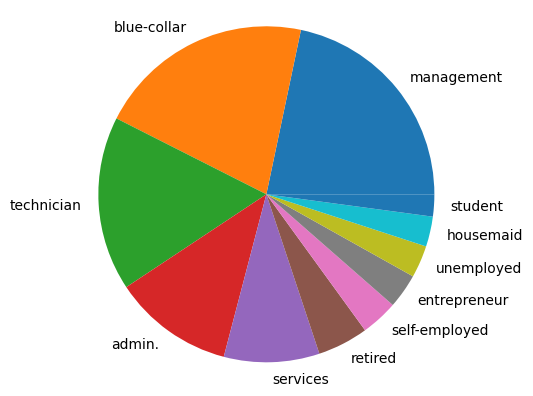

In [16]:
# job값의 레이블
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
# job의 값
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

# job의 원그래프를 작성
plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

married     0.600359
single      0.284766
divorced    0.114874
Name: marital, dtype: float64


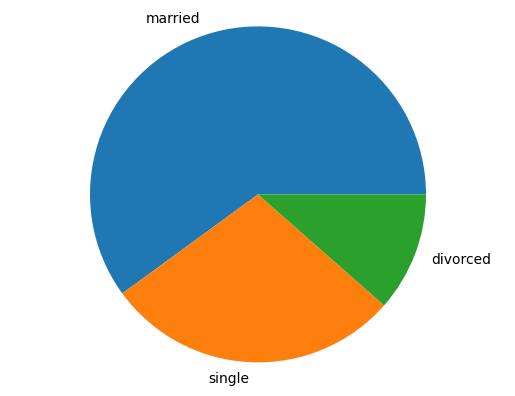

In [17]:
# 연습문제6
# marital값의 비율을 계산
print(bank_df['marital'].value_counts(ascending=False, normalize=True))

# marital값의 레이블
marital_label = bank_df['marital'].value_counts(ascending=False, normalize=True).index
# martial의 값
marital_vals = bank_df['marital'].value_counts(ascending=False, normalize=True).values

# marital의 원 그래프를 작성
plt.pie(marital_vals, labels=marital_label)
plt.axis('equal')
plt.show()

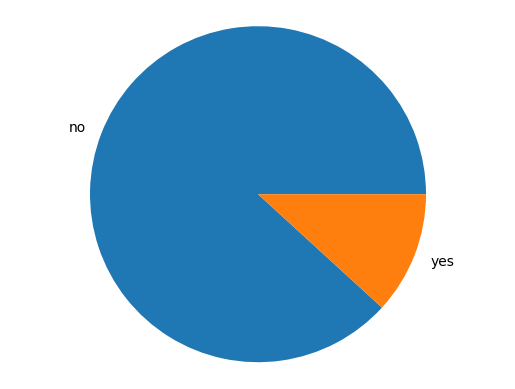

In [18]:
# y값의 레이블
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
# y의 값
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

# y의 원 그래프를 작성
plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

### 데이터의 가시화2

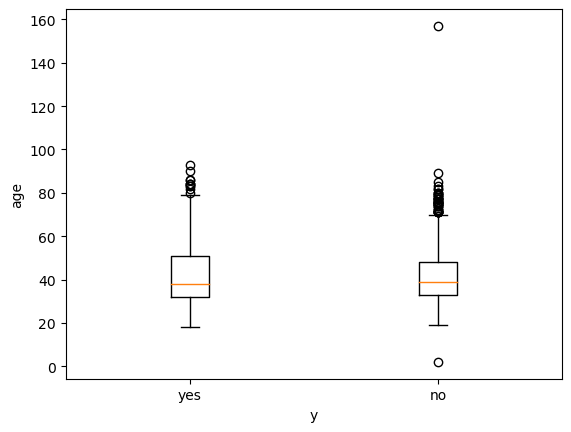

In [19]:
# y가 yes나 no일때의 age데이터를 추출
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
# yes와 no의 데이터를 정리
y_age = [y_yes['age'], y_no['age']]

# 박스수염 플롯의 작성
plt.boxplot(y_age)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
# y축 （종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

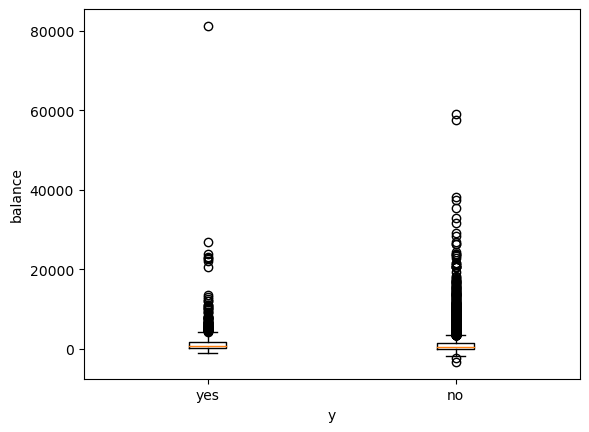

In [20]:
# 연습문제7
# yes와 no의 데이터를 정리
y_balance = [y_yes['balance'], y_no['balance']]

# 박스수염 플롯의 작성
plt.boxplot(y_balance)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('balance')
ax = plt.gca()
# y축（종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

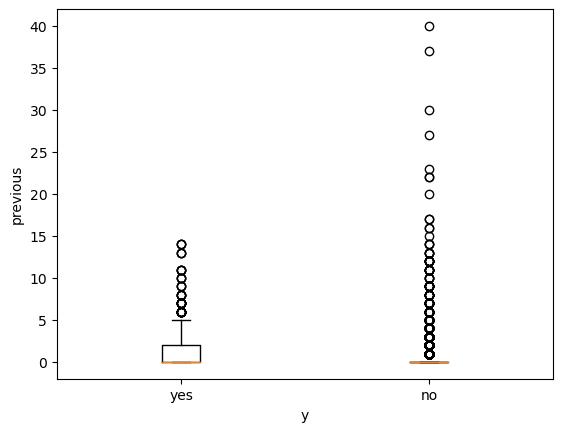

In [21]:
# 연습문제7
# yes와 no의 데이터를 정리
y_previous = [y_yes['previous'], y_no['previous']]

# 박스수염 플롯의 작성
plt.boxplot(y_previous)
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('y')
plt.ylabel('previous')
ax = plt.gca()
# y축（종축）의 레이블을 추가
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()